In [33]:
# Import the random module.
import random 
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit

In [34]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

11.1 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [35]:
def latitudes(x):
    latitudes = []
    while x < 1501:
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with x = 1.
%timeit latitudes(1)

1.57 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [38]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [39]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [40]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [41]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [43]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [44]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2542cf2578abf24fac37456405279597


In [45]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2542cf2578abf24fac37456405279597&q=Boston


In [46]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [47]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [48]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [49]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":49.86,"pressure":1015,"humidity":37,"temp_min":46.99,"temp_max":52},"visibility":16093,"wind":{"speed":18.34,"deg":220},"clouds":{"all":75},"dt":1573411121,"sys":{"type":1,"id":3486,"country":"US","sunrise":1573385312,"sunset":1573421271},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [50]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 49.86,
  'pressure': 1015,
  'humidity': 37,
  'temp_min': 46.99,
  'temp_max': 52},
 'visibility': 16093,
 'wind': {'speed': 18.34, 'deg': 220},
 'clouds': {'all': 75},
 'dt': 1573411121,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1573385312,
  'sunset': 1573421271},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [52]:
# Get the JSON data.
boston_data = city_weather.json()

In [53]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 52 37 75 18.34


In [54]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2019-11-10 18:38:41'

In [55]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [57]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [58]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | yellowknife
Processing Record 2 of Set 12 | new norfolk
Processing Record 3 of Set 12 | punta arenas
Processing Record 4 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 12 | nexo
Processing Record 6 of Set 12 | sao filipe
Processing Record 7 of Set 12 | sohag
Processing Record 8 of Set 12 | barrow
Processing Record 9 of Set 12 | cape town
Processing Record 10 of Set 12 | masjed-e soleyman
City not found. Skipping...
Processing Record 11 of Set 12 | puerto ayora
Processing Record 12 of Set 12 | kahului
Processing Record 13 of Set 12 | chokurdakh
Processing Record 14 of Set 12 | bluff
Processing Record 15 of Set 12 | mataura
Processing Record 16 of Set 12 | ponta do sol
Processing Record 17 of Set 12 | busselton
Processing Record 18 of Set 12 | smithers
Processing Record 19 of Set 12 | rikitea
Processing Record 20 of Set 12 | grindavik
Processing Record 21 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 22 of 

Processing Record 30 of Set 15 | college
Processing Record 31 of Set 15 | fortuna
Processing Record 32 of Set 15 | faanui
Processing Record 33 of Set 15 | chara
Processing Record 34 of Set 15 | victoria
Processing Record 35 of Set 15 | atar
Processing Record 36 of Set 15 | mocuba
Processing Record 37 of Set 15 | port blair
Processing Record 38 of Set 15 | cherskiy
Processing Record 39 of Set 15 | trinidad
Processing Record 40 of Set 15 | codrington
Processing Record 41 of Set 15 | lompoc
Processing Record 42 of Set 15 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 15 | thinadhoo
Processing Record 44 of Set 15 | abnub
Processing Record 45 of Set 15 | srednekolymsk
Processing Record 46 of Set 15 | metlika
Processing Record 47 of Set 15 | tecoanapa
Processing Record 48 of Set 15 | hearst
Processing Record 49 of Set 15 | la asuncion
Processing Record 50 of Set 15 | lavrentiya
Processing Record 1 of Set 16 | port lincoln
Processing Record 2 of Set 16 | ati
Processing Rec

Processing Record 20 of Set 19 | ventspils
Processing Record 21 of Set 19 | zile
Processing Record 22 of Set 19 | kodiak
Processing Record 23 of Set 19 | ambovombe
Processing Record 24 of Set 19 | fukue
Processing Record 25 of Set 19 | dunedin
Processing Record 26 of Set 19 | haines junction
Processing Record 27 of Set 19 | polyarnyy
Processing Record 28 of Set 19 | dalvik
Processing Record 29 of Set 19 | kudahuvadhoo
Processing Record 30 of Set 19 | terney
Processing Record 31 of Set 19 | roma
Processing Record 32 of Set 19 | zvecka
Processing Record 33 of Set 19 | marfino
Processing Record 34 of Set 19 | tura
Processing Record 35 of Set 19 | samusu
City not found. Skipping...
Processing Record 36 of Set 19 | altamont
Processing Record 37 of Set 19 | loandjili
Processing Record 38 of Set 19 | guerrero negro
Processing Record 39 of Set 19 | ulaanbaatar
Processing Record 40 of Set 19 | menongue
Processing Record 41 of Set 19 | villa maria
Processing Record 42 of Set 19 | krasnogvardeysk

City not found. Skipping...
Processing Record 7 of Set 23 | sinnamary
Processing Record 8 of Set 23 | agva
City not found. Skipping...
Processing Record 9 of Set 23 | hihifo
City not found. Skipping...
Processing Record 10 of Set 23 | gurskoye
City not found. Skipping...
Processing Record 11 of Set 23 | suntar
Processing Record 12 of Set 23 | springbok
Processing Record 13 of Set 23 | dudinka
Processing Record 14 of Set 23 | okhotsk
Processing Record 15 of Set 23 | nabire
Processing Record 16 of Set 23 | sakakah
City not found. Skipping...
Processing Record 17 of Set 23 | saint-joseph
Processing Record 18 of Set 23 | zharkent
Processing Record 19 of Set 23 | charagua
Processing Record 20 of Set 23 | touros
Processing Record 21 of Set 23 | maragogi
Processing Record 22 of Set 23 | lufilufi
Processing Record 23 of Set 23 | gallup
Processing Record 24 of Set 23 | maloy
Processing Record 25 of Set 23 | ryotsu
Processing Record 26 of Set 23 | pizarro
Processing Record 27 of Set 23 | ornskol

In [59]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.45,-114.38,3.99,84,20,2.24,CA,2019-11-10 18:38:53
1,New Norfolk,-42.78,147.06,52.00,66,87,8.05,AU,2019-11-10 18:39:01
2,Punta Arenas,-53.16,-70.91,48.20,66,95,13.87,CL,2019-11-10 18:38:49
3,Nexo,55.06,15.13,37.40,93,100,4.70,DK,2019-11-10 18:41:03
4,Sao Filipe,14.90,-24.50,75.51,80,84,17.83,CV,2019-11-10 18:38:45
5,Sohag,26.55,31.70,71.98,30,0,9.04,EG,2019-11-10 18:41:03
6,Barrow,-38.31,-60.23,73.45,46,100,14.45,AR,2019-11-10 18:38:44
7,Cape Town,-33.93,18.42,72.00,77,70,9.17,ZA,2019-11-10 18:37:36
8,Puerto Ayora,-0.74,-90.35,77.00,65,75,16.11,EC,2019-11-10 18:38:38
9,Kahului,20.89,-156.47,79.00,65,20,7.83,US,2019-11-10 18:39:06


In [60]:
New_Column_Order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[New_Column_Order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2019-11-10 18:38:53,62.45,-114.38,3.99,84,20,2.24
1,New Norfolk,AU,2019-11-10 18:39:01,-42.78,147.06,52.00,66,87,8.05
2,Punta Arenas,CL,2019-11-10 18:38:49,-53.16,-70.91,48.20,66,95,13.87
3,Nexo,DK,2019-11-10 18:41:03,55.06,15.13,37.40,93,100,4.70
4,Sao Filipe,CV,2019-11-10 18:38:45,14.90,-24.50,75.51,80,84,17.83
5,Sohag,EG,2019-11-10 18:41:03,26.55,31.70,71.98,30,0,9.04
6,Barrow,AR,2019-11-10 18:38:44,-38.31,-60.23,73.45,46,100,14.45
7,Cape Town,ZA,2019-11-10 18:37:36,-33.93,18.42,72.00,77,70,9.17
8,Puerto Ayora,EC,2019-11-10 18:38:38,-0.74,-90.35,77.00,65,75,16.11
9,Kahului,US,2019-11-10 18:39:06,20.89,-156.47,79.00,65,20,7.83


In [62]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [63]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [64]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1573413476.1480076

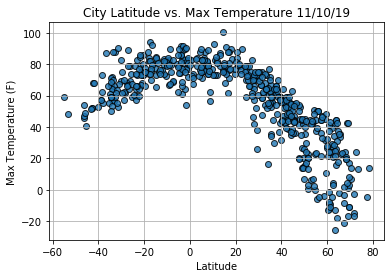

In [65]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

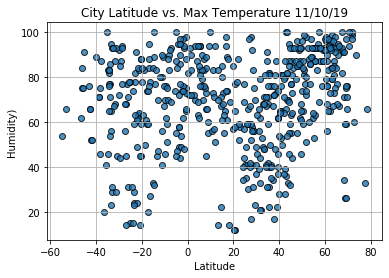

In [66]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity% "+ time.strftime("%x"))
plt.ylabel("Humidity%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

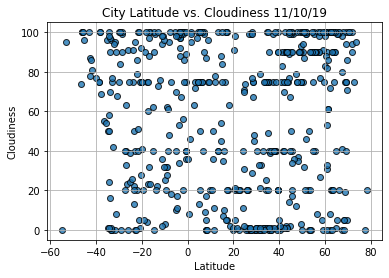

In [70]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

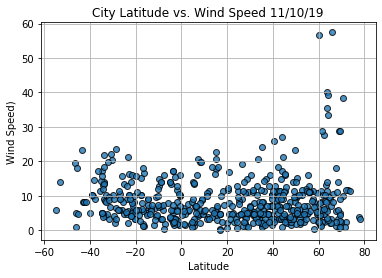

In [69]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()